In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

sns.set_theme(style='dark')

In [12]:
nba_data = pd.read_csv('all_seasons.csv')
nba_data.head()

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Travis Knight,LAL,22.0,213.36,106.59412,Connecticut,USA,1996,1,...,4.8,4.5,0.5,6.2,0.127,0.182,0.142,0.536,0.052,1996-97
1,1,Matt Fish,MIA,27.0,210.82,106.59412,North Carolina-Wilmington,USA,1992,2,...,0.3,0.8,0.0,-15.1,0.143,0.267,0.265,0.333,0.000,1996-97
2,2,Matt Bullard,HOU,30.0,208.28,106.59412,Iowa,USA,Undrafted,Undrafted,...,4.5,1.6,0.9,0.9,0.016,0.115,0.151,0.535,0.099,1996-97
3,3,Marty Conlon,BOS,29.0,210.82,111.13004,Providence,USA,Undrafted,Undrafted,...,7.8,4.4,1.4,-9.0,0.083,0.152,0.167,0.542,0.101,1996-97
4,4,Martin Muursepp,DAL,22.0,205.74,106.59412,None,USA,1996,1,...,3.7,1.6,0.5,-14.5,0.109,0.118,0.233,0.482,0.114,1996-97


In [13]:
print(nba_data.dtypes)

Unnamed: 0             int64
player_name           object
team_abbreviation     object
age                  float64
player_height        float64
player_weight        float64
college               object
country               object
draft_year            object
draft_round           object
draft_number          object
gp                     int64
pts                  float64
reb                  float64
ast                  float64
net_rating           float64
oreb_pct             float64
dreb_pct             float64
usg_pct              float64
ts_pct               float64
ast_pct              float64
season                object
dtype: object


In [14]:
players_ages = nba_data['age']
minimum_age = players_ages.min()
maximum_age = players_ages.max()
print('The minimum and maximum ages of players are {} and {}'.format(minimum_age, maximum_age))

The minimum and maximum ages of players are 18.0 and 44.0


In [15]:
bins = [15, 20, 25, 30, 35, 40, 45]
nba_data['binned_ages'] = pd.cut(nba_data['age'], bins)
print(nba_data[['binned_ages', 'age']])

      binned_ages   age
0        (20, 25]  22.0
1        (25, 30]  27.0
2        (25, 30]  30.0
3        (25, 30]  29.0
4        (20, 25]  22.0
...           ...   ...
11695    (25, 30]  30.0
11696    (25, 30]  28.0
11697    (20, 25]  25.0
11698    (30, 35]  31.0
11699    (20, 25]  25.0

[11700 rows x 2 columns]


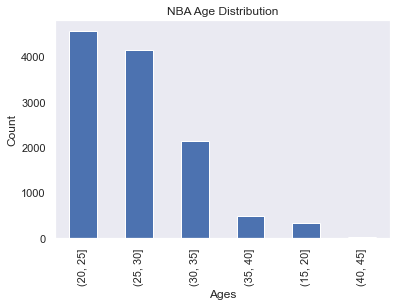

In [106]:
nba_data['binned_ages'].value_counts().plot(kind='bar')

plt.title('NBA Age Distribution')
plt.xlabel('Ages')
plt.ylabel('Count')

plt.show()

In [17]:
#A general description of the dataset
nba_data.describe()

,Unnamed: 0,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
count,11700.000000,11700.000000,11700.000000,11700.000000,11700.000000,11700.000000,11700.000000,11700.000000,11700.000000,11700.000000,11700.000000,11700.000000,11700.000000,11700.000000
mean,5849.500000,27.131966,200.728501,100.526791,51.717179,8.169299,3.564957,1.811179,-2.166410,0.054981,0.141534,0.185380,0.510402,0.131228
std,3377.643409,4.340006,9.169827,12.526481,24.985236,5.956115,2.487498,1.792117,12.076914,0.043595,0.062793,0.052957,0.098306,0.094244
min,0.000000,18.000000,160.020000,60.327736,1.000000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2924.750000,24.000000,193.040000,90.718400,32.000000,3.600000,1.800000,0.600000,-6.300000,0.021000,0.096000,0.150000,0.479000,0.065000
50%,5849.500000,26.000000,200.660000,99.790240,58.000000,6.700000,3.000000,1.200000,-1.300000,0.042000,0.132000,0.182000,0.523000,0.103000
75%,8774.250000,30.000000,208.280000,108.862080,74.000000,11.500000,4.700000,2.400000,3.200000,0.084000,0.180000,0.218000,0.559000,0.178000
max,11699.000000,44.000000,231.140000,163.293120,85.000000,36.100000,16.300000,11.700000,300.000000,1.000000,1.000000,1.000000,1.500000,1.000000


The 75th percentile of rebounds is 4.7 rebounds/game. This means that to be the top 25% in this timeframe in rebounding, you only have to get 5 rebounds every game. Still, something that sounds so simple isn't an easy feat - this is the greatest basketball league in the world, after all.

Also, the 75% percentile of points scored is 11.5/game. This means that to be a in the top 25% point scorer in this era you only need to have 12 point per game, that is either making four three-points per game or six two-point.

Similarly, to be in the top 25% of assists/game throughout this period, you only have to average 3 dimes/game. This will be interesting to analyze as we see where the bottom 75th percentile lie and what types of players give (and don't give) the most assists.

On average, players tend to have a negative net rating, meaning they let the opponents score more points than their team themselves score

<AxesSubplot:>

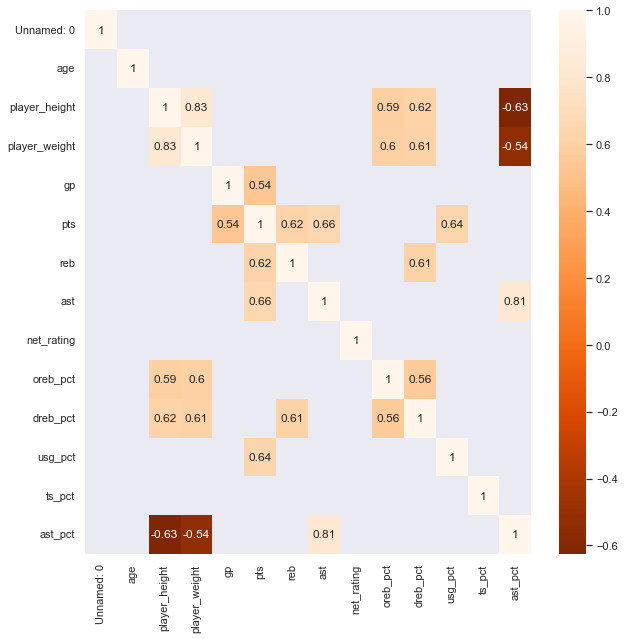

In [107]:
#Correlation between data
plt.figure(figsize=(10,10))

correlate = nba_data.corr()
correlation = correlate[abs(correlate)> 0.5]
sns.heatmap(correlation, annot=True, cmap = plt.cm.Oranges_r)

dreb_pct and oreb_pct has a strong positive correlation to player_height (Taller players get more rebounds)
player_height and ast_pct are negatively correlated (Shorter players tend to have higher assist percentages, which makes sense, since guards will mostly be handling the ball)
pts and ast are positively correlated (There is a higher likelihood that players who can score also can dish the ball to their teammates.

In [19]:
#top 20 players based on net ratings
net_rating_max = nba_data['net_rating'].max()
net_rating_min = nba_data['net_rating'].min()
print(net_rating_max, net_rating_min)

300.0 -200.0


In [74]:
#identifying top 20 players based on net ratings
sorted_list =  nba_data.sort_values(by='net_rating', ascending=False)
print(sorted_list[['player_name', 'net_rating', 'team_abbreviation']][:20])
#print(sorted_list[['player_name', 'net_rating']])


             player_name  net_rating team_abbreviation
275          Bruce Bowen       300.0               MIA
10016    Naz Mitrou-Long       250.0               UTA
10731        J.P. Macura       150.0               CLE
8161    Jerrelle Benimon       120.0               DEN
6784       Hamady Ndiaye       114.3               WAS
11145          Max Strus       105.8               CHI
3229       Ryan Humphrey        94.8               MEM
1140         Mikki Moore        89.7               DET
9992    Nicolas Brussino        88.6               ATL
4298    Slava Medvedenko        88.5               LAL
5464         Steven Hill        79.0               OKC
2142       David Wingate        70.6               SEA
5867          Ryan Bowen        69.2               OKC
10024  Matt Williams Jr.        66.7               MIA
11518      Udonis Haslem        66.7               MIA
8303         Malcolm Lee        66.7               PHI
10167       Kobi Simmons        66.7               CLE
945       

In [77]:
#identifying 20 least rated players based on net ratings
sorted_list =  nba_data.sort_values(by='net_rating', ascending=True)
print(sorted_list[['player_name', 'net_rating', 'team_abbreviation']][:20])

            player_name  net_rating team_abbreviation
953    Gheorghe Muresan      -200.0               NJN
1627      Jason Miskiri      -158.3               CHH
9922        Tyler Lydon      -150.0               DEN
11529       Will Magnay      -148.2               NOP
431      Elmore Spencer      -147.5               SEA
6587   Hassan Whiteside      -144.9               SAC
4543          Mile Ilic      -143.1               NJN
4413         Matt Walsh      -140.5               MIA
9745      Edmond Sumner      -120.0               IND
11359  Anzejs Pasecniks      -104.4               WAS
7267        Will Conroy      -100.2               MIN
9730      Chris Boucher      -100.0               GSW
7811        Chris Smith       -98.5               NYK
4404               Nene       -96.1               DEN
6509      Brian Skinner       -95.6               MIL
10313    Terrence Jones       -95.6               HOU
1544     Rodrick Rhodes       -91.2               DAL
4553   Randy Livingston     

In [71]:
#Players that made 50 net or more this season
players = nba_data.loc[nba_data['net_rating'] >= 50.0]['player_name']
print(players)

275            Bruce Bowen
945             Gary Grant
1032         Tyson Wheeler
1140           Mikki Moore
1504       Randell Jackson
2142         David Wingate
2674          Paul Shirley
3229         Ryan Humphrey
4180         Bryon Russell
4298      Slava Medvedenko
4940          Jerome James
5464           Steven Hill
5867            Ryan Bowen
6274           Mike Harris
6784         Hamady Ndiaye
8161      Jerrelle Benimon
8303           Malcolm Lee
9992      Nicolas Brussino
10016      Naz Mitrou-Long
10024    Matt Williams Jr.
10167         Kobi Simmons
10220            RJ Hunter
10317       Tahjere McCall
10543         John Holland
10731          J.P. Macura
11145            Max Strus
11155       Marques Bolden
11518        Udonis Haslem
Name: player_name, dtype: object


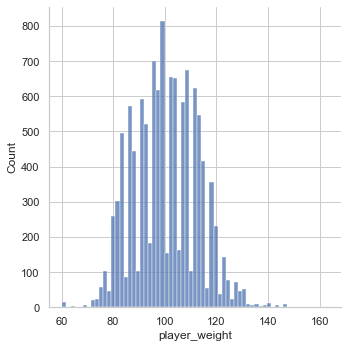

In [101]:
#Overview of player weight
player_weight = nba_data['player_weight']
sns.displot(player_weight)

In [79]:
print(player_weight.skew())

0.1616352117350845


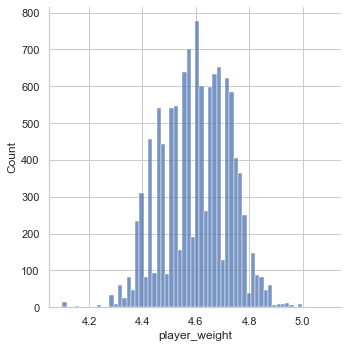

In [102]:
#Transform data to get a reduce skewness for effective usability
log_player_weight = np.log(player_weight)
sns.displot(log_player_weight)

In [81]:
print(log_player_weight.skew())

-0.17336773962035162


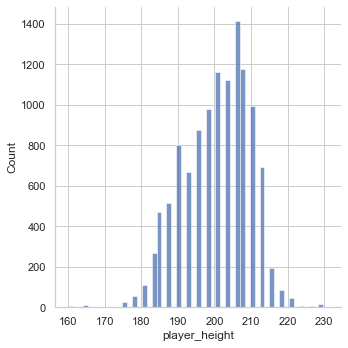

In [103]:
#Overview of player height
player_weight = nba_data['player_height']
sns.displot(player_weight)

In [111]:
#Visualize average trend function

def viz_average_trend(col):
    total_players_for_a_team = pd.DataFrame(nba_data.groupby(['team_abbreviation', 'season'])[col].mean())
    total_players_for_a_team = total_players_for_a_team.rename({'player_name': f'Average {col}'}, axis=1)
    total_players_for_a_team.reset_index().head()
    
    plt.figure(figsize=(20,10))
    sns.lineplot('season', col, data=total_players_for_a_team)
    
    title = (' '.join(col.split('_'))).title()
    
    plt.xticks(rotation=-30)
    plt.ylabel(title)
    plt.title(f'Average {title} per season', fontsize=20)
    
    plt.show()

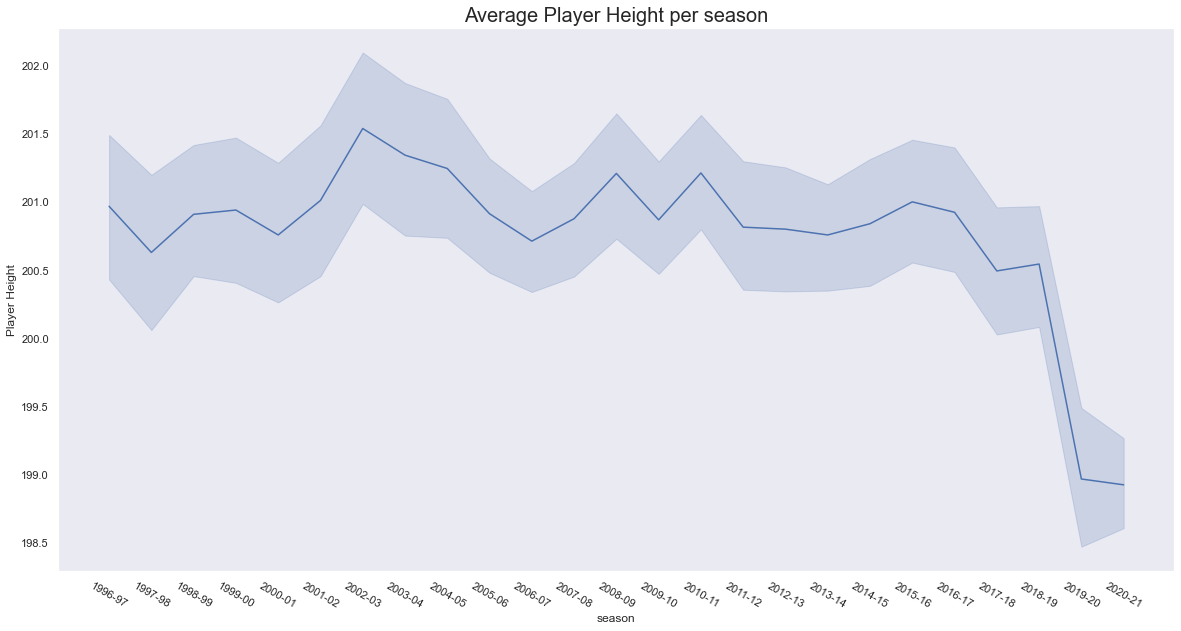

In [112]:
viz_average_trend('player_height')

The average NBA player height seems to have gone through a downward trend. The success of small-ball lineups featured by the Golden State Warriors in their famed 73-9 season is a strong driving force for this movement. Perhaps the importance of the three point shot in today's game also contributed to the tendency of teams prioritizing sharpshooters instead of big men

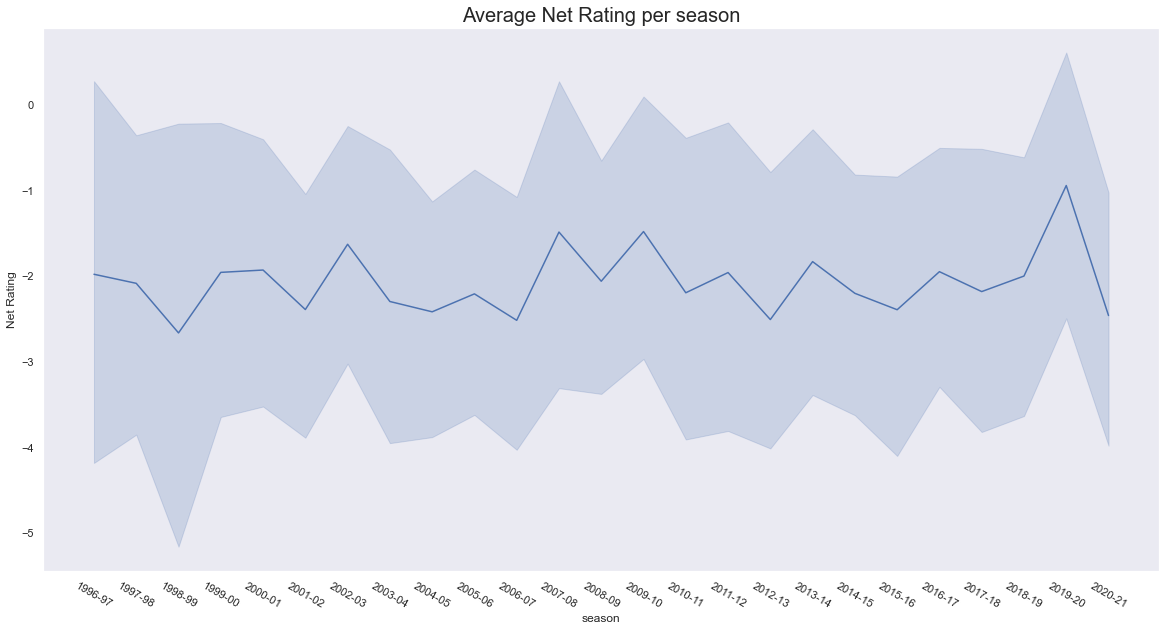

In [114]:
viz_average_trend('net_rating')

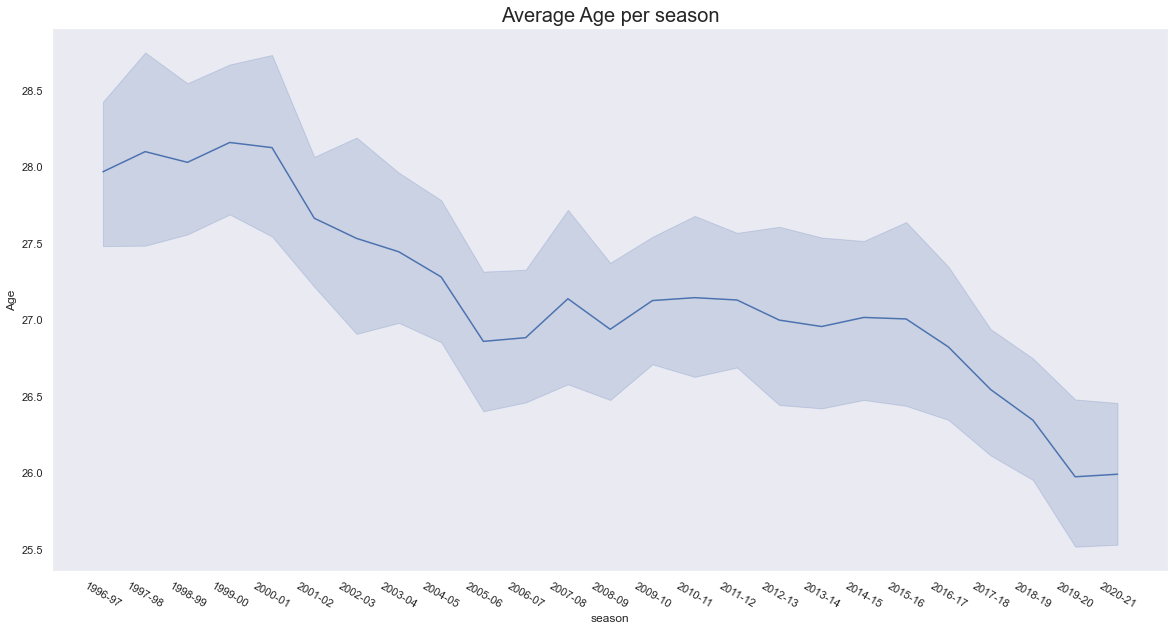

In [115]:
viz_average_trend('age')

That's interesting. The average age for an NBA team has gone down by almost 2 years over the past 25 years. It seems like teams have an increased tendency to invest in their younger players. The youth is the future, and it seems like the future is here to stay